In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import scipy as sp
from scipy.stats import norm
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Sep 09 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [ ]:
#getting a dataframe with only integers and float64s

df_nums = X.select_dtypes(include=['int64','float64'])
print(df_nums.head)
print(df_nums.describe)

<bound method NDFrame.head of        age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0       39   77516             13          2174             0              40
1       50   83311             13             0             0              13
2       38  215646              9             0             0              40
3       53  234721              7             0             0              40
4       28  338409             13             0             0              40
...    ...     ...            ...           ...           ...             ...
48837   39  215419             13             0             0              36
48838   64  321403              9             0             0              40
48839   38  374983             13             0             0              50
48840   44   83891             13          5455             0              40
48841   35  182148             13             0             0              60

[48842 rows x 6 columns]>
<bound 

In [ ]:
missing_values = df_nums.isnull().sum()
print(missing_values)

age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64


# **Age column**

In [ ]:
df_age = df_nums['age']
df_age.describe()
print(df_age.head)

<bound method NDFrame.head of 0        39
1        50
2        38
3        53
4        28
         ..
48837    39
48838    64
48839    38
48840    44
48841    35
Name: age, Length: 48842, dtype: int64>


## **New section for Friday Updates**

In [ ]:
print(df_age.size)

48842


### **Population**

38.64358543876172
187.9742339649884
13.71036957798689


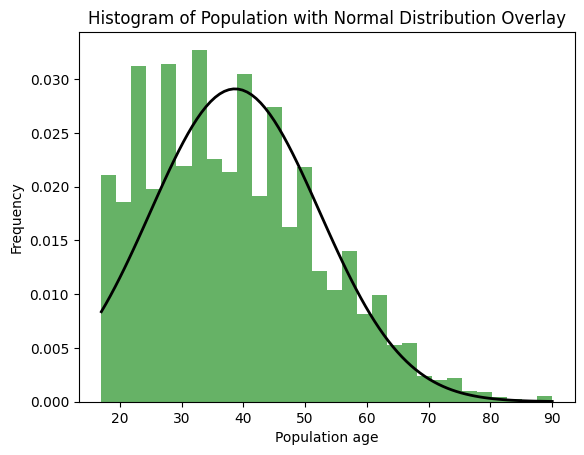

In [ ]:
#to get age mean, var, std dev, zscore conf inter
print(df_age.mean())
print(np.var(df_age))
print(np.std(df_age))
plt.hist(df_age, bins=30, density=True, alpha=0.6, color='g') #our histogram

#overlaying a normal dist
x = np.linspace(min(df_age), max(df_age), 100)
p = norm.pdf(x, df_age.mean(), np.std(df_age)) #/ np.sqrt(sample_size)
plt.plot(x,p, 'k', linewidth=2)

plt.title('Histogram of Population with Normal Distribution Overlay')
plt.xlabel('Population age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
z_score = norm.ppf(0.975)  # 95% confidence interval
margin_of_error = z_score * (np.std(df_age) / np.sqrt(df_age.size))
conf_interval = (df_age.mean() - margin_of_error, df_age.mean() + margin_of_error)

print(f"95% Confidence Interval for the Mean: {conf_interval[0]:.2f} - {conf_interval[1]:.2f}")

95% Confidence Interval for the Mean: 38.52 - 38.77


### **With replacment**

Mean of Sample Means: 38.73
Variance of Sample Means: 3.68
Standard Deviation of Sample Means: 1.92


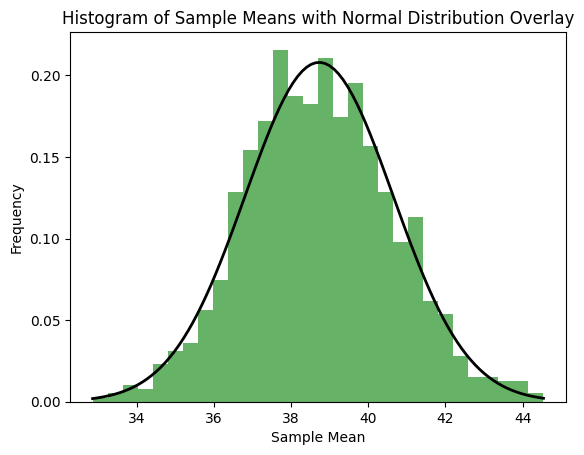

In [ ]:
#sampling w mean
def sample_mean(data, sample_size):
  sample=data.sample(n=sample_size, replace =True) #keeping replace true for here
  return sample.mean()

n_samples = 1000
sample_size = 50
sample_means = [
    sample_mean(df_age, sample_size) for _ in range(n_samples)
] #storing in an array our samples' means

#mean, variance, standard deviation of sampled means
mean_sample_means = np.mean(sample_means)
variance_sample_means = np.var(sample_means)
standard_deviation_means = np.std(sample_means)

print(f"Mean of Sample Means: {mean_sample_means:.2f}") #f"... f-string format to do func call etc inside print
print(f"Variance of Sample Means: {variance_sample_means:.2f}") #:.2f for format specifier, precision, how many places and what type
print(f"Standard Deviation of Sample Means: {standard_deviation_means:.2f}")

plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g') #our histogram

#overlaying a normal dist
x = np.linspace(min(sample_means), max(sample_means), 100)
p = norm.pdf(x, mean_sample_means, standard_deviation_means) #/ np.sqrt(sample_size)
plt.plot(x,p, 'k', linewidth=2)

plt.title('Histogram of Sample Means with Normal Distribution Overlay')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Confidence interval calcer
z_score = norm.ppf(0.975)  # 95% confidence interval
margin_of_error = z_score * (standard_deviation_means / np.sqrt(sample_size))
conf_interval = (mean_sample_means - margin_of_error, mean_sample_means + margin_of_error)

print(f"95% Confidence Interval for the Mean: {conf_interval[0]:.2f} - {conf_interval[1]:.2f}")


95% Confidence Interval for the Mean: 38.07 - 39.16


In [ ]:
#Bootstrap
# Select a single sample of size 30
sample_size_bootstrap = 30
random_sample_bootstrap = df_age.sample(n=sample_size_bootstrap, replace=True)

# Function to perform bootstrapping
def bootstrap(data, n_bootstrap_samples):
    bootstrap_means = [data.sample(frac=1, replace=True).mean() for _ in range(n_bootstrap_samples)]
    return np.array(bootstrap_means)

# Perform bootstrapping
n_bootstrap_samples = 1000
bootstrap_means = bootstrap(random_sample_bootstrap, n_bootstrap_samples)

# Calculate mean, variance, and standard deviation of bootstrap means
mean_bootstrap_means = np.mean(bootstrap_means)
std_dev_bootstrap_means = np.std(bootstrap_means)

print(f"Bootstrap Mean Estimate: {mean_bootstrap_means:.2f}")
print(f"Bootstrap Standard Deviation: {std_dev_bootstrap_means:.2f}")

# Confidence interval for the bootstrap means
conf_interval_bootstrap = np.percentile(bootstrap_means, [2.5, 97.5])
print(f"95% Confidence Interval from Bootstrapping: {conf_interval_bootstrap[0]:.2f} - {conf_interval_bootstrap[1]:.2f}")


Bootstrap Mean Estimate: 40.24
Bootstrap Standard Deviation: 2.41
95% Confidence Interval from Bootstrapping: 35.46 - 45.07


In [ ]:
#proportion confidence interval
# Define a binary outcome for proportion calculation (e.g., age > 50)
proportion_column = (df_age > 50).astype(int)

# Select a sample from this binary outcome
sample_proportion = proportion_column.sample(n=sample_size, replace=True)
p_hat = sample_proportion.mean()

# Confidence interval for proportion
z_score_prop = norm.ppf(0.975)
standard_error_prop = np.sqrt(p_hat * (1 - p_hat) / sample_size)
margin_of_error_prop = z_score_prop * standard_error_prop
conf_interval_prop = (p_hat - margin_of_error_prop, p_hat + margin_of_error_prop)

print(f"Sample Proportion: {p_hat:.2f}")
print(f"95% Confidence Interval for Proportion: {conf_interval_prop[0]:.2f} - {conf_interval_prop[1]:.2f}")
print(f"Margin of Error: {margin_of_error_prop:.2f}")


Sample Proportion: 0.24
95% Confidence Interval for Proportion: 0.12 - 0.36
Margin of Error: 0.12


**A single bootstrap**

In [ ]:
#Bootstrap
# Select a single sample of size 30
sample_size_bootstrap = 30
random_sample_bootstrap = df_age.sample(n=sample_size_bootstrap, replace=True)

# Function to perform bootstrapping
def bootstrap(data, n_bootstrap_samples):
    bootstrap_means = [data.sample(frac=1, replace=True).mean() for _ in range(n_bootstrap_samples)]
    return np.array(bootstrap_means)

# Perform bootstrapping
n_bootstrap_samples = 1
bootstrap_means = bootstrap(random_sample_bootstrap, n_bootstrap_samples)

# Calculate mean, variance, and standard deviation of bootstrap means
mean_bootstrap_means = np.mean(bootstrap_means)
std_dev_bootstrap_means = np.std(bootstrap_means)

print(f"Bootstrap Mean Estimate: {mean_bootstrap_means:.2f}")
print(f"Bootstrap Standard Deviation: {std_dev_bootstrap_means:.2f}")

# Confidence interval for the bootstrap means
conf_interval_bootstrap = np.percentile(bootstrap_means, [2.5, 97.5])
print(f"95% Confidence Interval from Bootstrapping: {conf_interval_bootstrap[0]:.2f} - {conf_interval_bootstrap[1]:.2f}")




#proportion confidence interval
# Define a binary outcome for proportion calculation (e.g., age > 50)
proportion_column = (df_age > 50).astype(int)

# Select a sample from this binary outcome
sample_proportion = proportion_column.sample(n=sample_size, replace=True)
p_hat = sample_proportion.mean()

# Confidence interval for proportion
z_score_prop = norm.ppf(0.975)
standard_error_prop = np.sqrt(p_hat * (1 - p_hat) / sample_size)
margin_of_error_prop = z_score_prop * standard_error_prop
conf_interval_prop = (p_hat - margin_of_error_prop, p_hat + margin_of_error_prop)

print(f"Sample Proportion: {p_hat:.2f}")
print(f"95% Confidence Interval for Proportion: {conf_interval_prop[0]:.2f} - {conf_interval_prop[1]:.2f}")
print(f"Margin of Error: {margin_of_error_prop:.2f}")

Bootstrap Mean Estimate: 35.97
Bootstrap Standard Deviation: 0.00
95% Confidence Interval from Bootstrapping: 35.97 - 35.97
Sample Proportion: 0.14
95% Confidence Interval for Proportion: 0.04 - 0.24
Margin of Error: 0.10


## **Previously**

In [ ]:
#sampling function to take random sample of size n from this dataframe
def sample_age(n):
  return df_age.sample(n)

# a for loop to get
print(sample_age(1000))

39023    33
37865    35
18814    43
47675    37
37530    27
         ..
11675    36
11060    58
16284    51
30797    33
47850    36
Name: age, Length: 1000, dtype: int64


Mean of Sample Means: 38.62
Variance of Sample Means: 3.82
Standard Deviation of Sample Means: 1.95


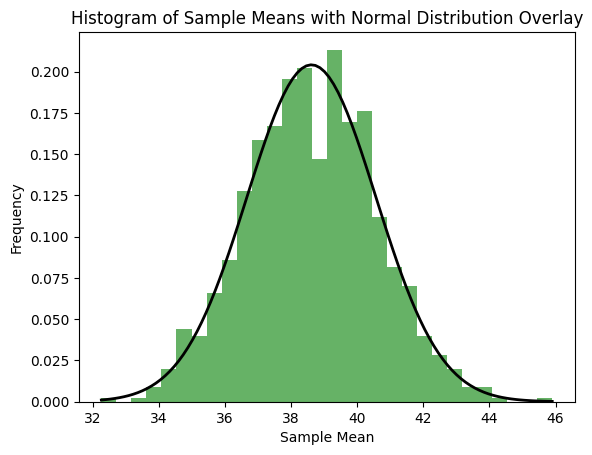

In [ ]:
#sampling w mean
def sample_mean(data, sample_size):
  sample=data.sample(n=sample_size, replace =False) #keeping replace false for here
  return sample.mean()

n_samples = 1000
sample_size = 50
sample_means = [
    sample_mean(df_age, sample_size) for _ in range(n_samples)
] #storing in an array our samples' means

#mean, variance, standard deviation of sampled means
mean_sample_means = np.mean(sample_means)
variance_sample_means = np.var(sample_means)
standard_deviation_means = np.std(sample_means)

print(f"Mean of Sample Means: {mean_sample_means:.2f}") #f"... f-string format to do func call etc inside print
print(f"Variance of Sample Means: {variance_sample_means:.2f}") #:.2f for format specifier, precision, how many places and what type
print(f"Standard Deviation of Sample Means: {standard_deviation_means:.2f}")

plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g') #our histogram

#overlaying a normal dist
x = np.linspace(min(sample_means), max(sample_means), 100)
p = norm.pdf(x, mean_sample_means, standard_deviation_means) #/ np.sqrt(sample_size)
plt.plot(x,p, 'k', linewidth=2)

plt.title('Histogram of Sample Means with Normal Distribution Overlay')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Confidence interval calcer
z_score = norm.ppf(0.975)  # 95% confidence interval
margin_of_error = z_score * (standard_deviation_means / np.sqrt(sample_size))
conf_interval = (mean_sample_means - margin_of_error, mean_sample_means + margin_of_error)

print(f"95% Confidence Interval for the Mean: {conf_interval[0]:.2f} - {conf_interval[1]:.2f}")


95% Confidence Interval for the Mean: 38.07 - 39.16


In [ ]:
#Bootstrap
# Select a single sample of size 30
sample_size_bootstrap = 30
random_sample_bootstrap = df_age.sample(n=sample_size_bootstrap, replace=False)

# Function to perform bootstrapping
def bootstrap(data, n_bootstrap_samples):
    bootstrap_means = [data.sample(frac=1, replace=True).mean() for _ in range(n_bootstrap_samples)]
    return np.array(bootstrap_means)

# Perform bootstrapping
n_bootstrap_samples = 1000
bootstrap_means = bootstrap(random_sample_bootstrap, n_bootstrap_samples)

# Calculate mean, variance, and standard deviation of bootstrap means
mean_bootstrap_means = np.mean(bootstrap_means)
std_dev_bootstrap_means = np.std(bootstrap_means)

print(f"Bootstrap Mean Estimate: {mean_bootstrap_means:.2f}")
print(f"Bootstrap Standard Deviation: {std_dev_bootstrap_means:.2f}")

# Confidence interval for the bootstrap means
conf_interval_bootstrap = np.percentile(bootstrap_means, [2.5, 97.5])
print(f"95% Confidence Interval from Bootstrapping: {conf_interval_bootstrap[0]:.2f} - {conf_interval_bootstrap[1]:.2f}")


Bootstrap Mean Estimate: 37.58
Bootstrap Standard Deviation: 1.77
95% Confidence Interval from Bootstrapping: 34.13 - 40.97


In [ ]:
#proportion confidence interval
# Define a binary outcome for proportion calculation (e.g., age > 50)
proportion_column = (df_age > 50).astype(int)

# Select a sample from this binary outcome
sample_proportion = proportion_column.sample(n=sample_size, replace=False)
p_hat = sample_proportion.mean()

# Confidence interval for proportion
z_score_prop = norm.ppf(0.975)
standard_error_prop = np.sqrt(p_hat * (1 - p_hat) / sample_size)
margin_of_error_prop = z_score_prop * standard_error_prop
conf_interval_prop = (p_hat - margin_of_error_prop, p_hat + margin_of_error_prop)

print(f"Sample Proportion: {p_hat:.2f}")
print(f"95% Confidence Interval for Proportion: {conf_interval_prop[0]:.2f} - {conf_interval_prop[1]:.2f}")
print(f"Margin of Error: {margin_of_error_prop:.2f}")


Sample Proportion: 0.12
95% Confidence Interval for Proportion: 0.03 - 0.21
Margin of Error: 0.09
